# Basic Natural Language Processing and Modifying .csv files

### Importing Libraries

In [413]:
import pandas as pd
import nltk
import string
import seaborn as sns
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import pos_tag
from nltk.util import ngrams
import matplotlib.pyplot as plt
from collections import Counter

### Importing Data resources

In [107]:
raw_test_loc = "./resource_data/train.csv"
test_loc = "./modified_resources_data/test_df.csv"

### Converting to Python Objects

In [108]:
def to_df(filepath):
    df = pd.read_csv(filepath).dropna()
    cols = df.columns
    col_dict= {}
    for i in cols:
        col_dict[i] = df[i].unique()
    for i in col_dict.keys():
        print("Unique", i ,":", end= " ")
        if (len(col_dict[i]) < 10):
            print( col_dict[i])
        else:
            print(len(col_dict[i]))
    return df

### Preprocessing with NLTK

In [109]:
def pre_process(text):
#   Lower Texts
    text = text.lower()
#   Remove Punctuation
    text_p = "".join([char for char in text if char not in string.punctuation])
#   Tokenize
    words = word_tokenize(text_p)
#   Stopword Filtering
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
#   Stemming 
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]
#   Part of Speech Token
    pos = pos_tag(filtered_words)
    return [words, filtered_words, stemmed, pos]
def toNGrams(token, n):
    return list(ngrams(token, n))

### Modifying the Data Frames (THIS TAKES FOREVER TRY TO AVOID)

In [113]:
# test_df = to_df(raw_test_loc)
# test_df['words'] = None
# test_df['filtered_words'] = None
# test_df['stemmed_words'] = None
# test_df['word_count'] = None
# test_df['pos'] = None
# for i in test_df.index:
#     text_processed = pre_process(test_df['discourse_text'][i])
#     test_df['words'][i] = text_processed[0]
#     test_df['filtered_words'][i] = text_processed[1]
#     test_df['stemmed_words'][i] = text_processed[2]
#     test_df['word_count'][i] = len(text_processed[0])
#     test_df['pos'][i] = text_processed[3]

Unique discourse_id : 36765
Unique essay_id : 4191
Unique discourse_text : 36691
Unique discourse_type : ['Lead' 'Position' 'Claim' 'Evidence' 'Counterclaim' 'Rebuttal'
 'Concluding Statement']
Unique discourse_effectiveness : ['Adequate' 'Ineffective' 'Effective']


# Data Analysis

### Importing the new Data frame from CSV

In [360]:
test_df = to_df(test_loc)

Unique discourse_id : 36765
Unique essay_id : 4191
Unique discourse_text : 36691
Unique discourse_type : ['Lead' 'Position' 'Claim' 'Evidence' 'Counterclaim' 'Rebuttal'
 'Concluding Statement']
Unique discourse_effectiveness : ['Adequate' 'Ineffective' 'Effective']
Unique words : 36561
Unique filtered_words : 36355
Unique stemmed_words : 36295
Unique word_count : 374
Unique pos : 36355


### Making Data frames for each effectiveness [Effective, Ineffective, Adequate]

In [385]:
effective_df=test_df.loc[test_df['discourse_effectiveness'] == "Effective"]
ineffective_df = test_df.loc[test_df['discourse_effectiveness'] == "Ineffective"]
adequate_df = test_df.loc[test_df['discourse_effectiveness'] == "Adequate"]

evidence_df = test_df.loc[test_df['discourse_type'] == 'Evidence']
rebuttal_df = test_df.loc[test_df['discourse_type'] == 'Rebuttal']
claim_df = test_df.loc[test_df['discourse_type'] == 'Claim']
counterclaim_df = test_df.loc[test_df['discourse_type'] == 'Counterclaim']
position_df = test_df.loc[test_df['discourse_type'] == 'Position']
lead_df = test_df.loc[test_df['discourse_type'] == 'Lead']
concluding_df = test_df.loc[test_df['discourse_type'] == 'Concluding Statement']

### Word count vs Effectiveness.
This can be used to see if there is a correlation between the number of words written vs its effectiveness

discourse_effectiveness
Adequate       35.052963
Effective      63.239653
Ineffective    48.578149
Name: word_count, dtype: float64

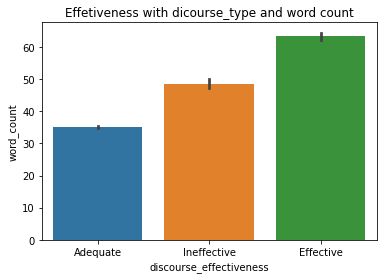

In [383]:
sns.barplot(data=test_df, y='word_count', 
            x= 'discourse_effectiveness',
            errorbar=('ci',95),
           ).set(title="Effetiveness with dicourse_type and word count")
test_df.groupby('discourse_effectiveness').word_count.mean()

# Effectiveness Statistics

### Effectiveness Pie Chart

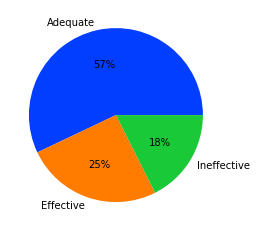

In [378]:
series = test_df['discourse_effectiveness'].value_counts()
plt.pie(series.values, labels=series.index, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()

### Discourse Effectiveness : Effective

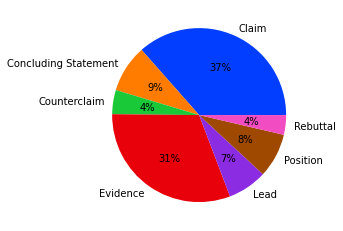

Claim                   3405
Concluding Statement     825
Counterclaim             418
Evidence                2885
Lead                     683
Position                 770
Rebuttal                 340
Name: discourse_type, dtype: int64


In [380]:
series = effective_df['discourse_type'].value_counts().sort_index()
plt.pie(series.values, labels=series.index, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()
print(series)

##### Word Count

[Text(0.5, 1.0, 'Word Count vs Discourse_type')]

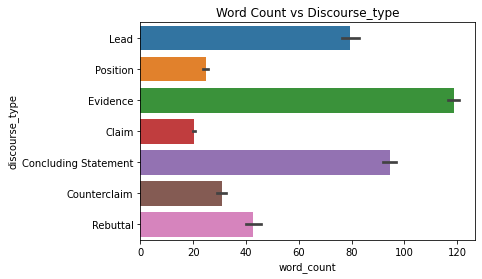

In [408]:
sns.barplot(data=effective_df,
           y = 'discourse_type',
           x ='word_count').set(title="Word Count vs Discourse_type")

### Discourse Effectiveness : Adequate

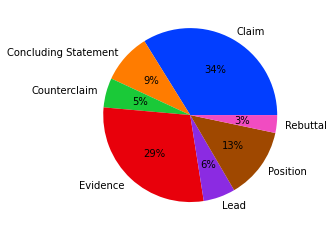

Claim                   7097
Concluding Statement    1945
Counterclaim            1150
Evidence                6064
Lead                    1244
Position                2784
Rebuttal                 693
Name: discourse_type, dtype: int64


In [374]:
series =adequate_df['discourse_type'].value_counts().sort_index()
plt.pie(series.values, labels=series.index, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()
print(series)

##### Word Count

[Text(0.5, 1.0, 'Word Count vs Discourse_type')]

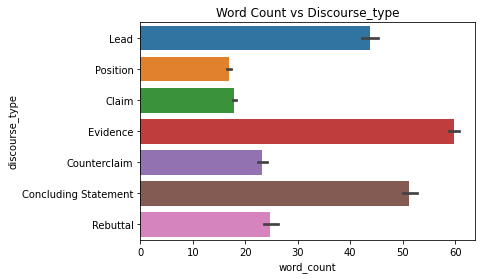

In [502]:
sns.barplot(data=adequate_df,
           y = 'discourse_type',
           x ='word_count').set(title="Word Count vs Discourse_type")

### Discourse Effectiveness : Adequate

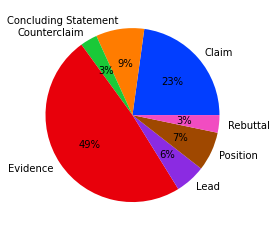

Claim                   1475
Concluding Statement     581
Counterclaim             205
Evidence                3156
Lead                     364
Position                 470
Rebuttal                 211
Name: discourse_type, dtype: int64


In [379]:
series =ineffective_df['discourse_type'].value_counts().sort_index()
plt.pie(series.values, labels=series.index, colors=sns.color_palette('bright'), autopct='%.0f%%')
plt.show()
print(series)

##### Word Count

[Text(0.5, 1.0, 'Word Count vs Discourse_type')]

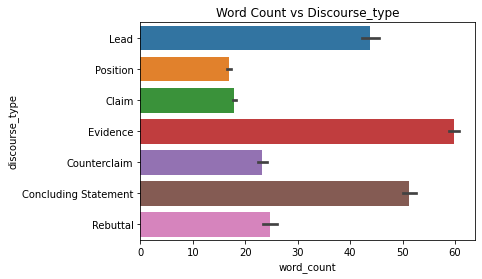

In [412]:
sns.barplot(data=adequate_df,
           y = 'discourse_type',
           x ='word_count').set(title="Word Count vs Discourse_type")

# Word Statistics

In [418]:
test_df.head()

,discourse_id,essay_id,discourse_text,discourse_type,discourse_effectiveness,words,filtered_words,stemmed_words,word_count,pos
0,0013cc385424,007ACE74B050,"Hi, i'm Isaac, i'm going to be writing about h...",Lead,Adequate,"['hi', 'im', 'isaac', 'im', 'going', 'to', 'be...","['hi', 'im', 'isaac', 'im', 'going', 'writing'...","['hi', 'im', 'isaac', 'im', 'go', 'write', 'fa...",67,"[('hi', 'NN'), ('im', 'NN'), ('isaac', 'NN'), ..."
1,9704a709b505,007ACE74B050,"On my perspective, I think that the face is a ...",Position,Adequate,"['on', 'my', 'perspective', 'i', 'think', 'tha...","['perspective', 'think', 'face', 'natural', 'l...","['perspect', 'think', 'face', 'natur', 'landfo...",41,"[('perspective', 'NN'), ('think', 'NN'), ('fac..."
2,c22adee811b6,007ACE74B050,I think that the face is a natural landform be...,Claim,Adequate,"['i', 'think', 'that', 'the', 'face', 'is', 'a...","['think', 'face', 'natural', 'landform', 'life...","['think', 'face', 'natur', 'landform', 'life',...",21,"[('think', 'VB'), ('face', 'NN'), ('natural', ..."
3,a10d361e54e4,007ACE74B050,"If life was on Mars, we would know by now. The...",Evidence,Adequate,"['if', 'life', 'was', 'on', 'mars', 'we', 'wou...","['life', 'mars', 'would', 'know', 'reason', 't...","['life', 'mar', 'would', 'know', 'reason', 'th...",72,"[('life', 'NN'), ('mars', 'NNS'), ('would', 'M..."
4,db3e453ec4e2,007ACE74B050,People thought that the face was formed by ali...,Counterclaim,Adequate,"['people', 'thought', 'that', 'the', 'face', '...","['people', 'thought', 'face', 'formed', 'aliea...","['peopl', 'thought', 'face', 'form', 'aliean',...",18,"[('people', 'NNS'), ('thought', 'VBD'), ('face..."
